### Benchmarking resource requirements
 - Tested on locally hosted docker container
 - Since files are on the same machine, network transfer speeds are not representative

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dockerstats import summary
sns.set()

- Linear growth in .rds file size as number of cells. 
- 30,000 QC pass cells take up ~ 1 Gb

Azimuth config file options:
```json
Azimuth.app.max_cells: 100,000
shiny.maxRequestSize: 104,857,6000 # ~1.05 Gb (assuming bits)
```

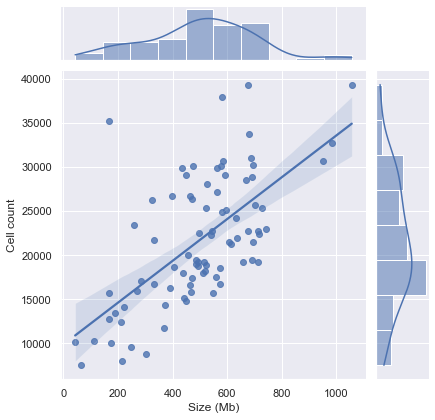

In [2]:
#Pre-QC number of cells vs. file size
meta_df = pd.read_csv('query_size_counts.csv')
p = sns.jointplot(data=meta_df, x="size", y="cells", kind='reg')
p.ax_joint.set(xlabel='Size (Mb)',ylabel='Cell count')
plt.show()

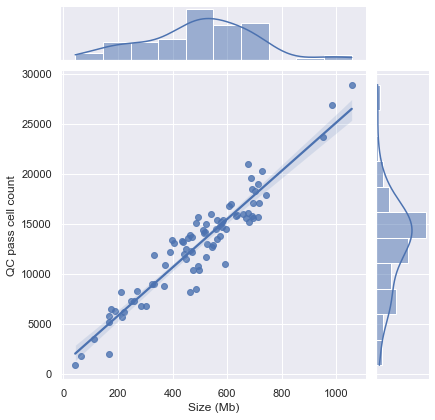

In [3]:
#Post-QC number of cells vs. file size
meta_df = pd.read_csv('query_size_counts.csv')
p = sns.jointplot(data=meta_df, x="size", y="cells_postQC", kind='reg')
p.ax_joint.set(xlabel='Size (Mb)',ylabel='QC pass cell count')
plt.show()

Filesize: 283 MB; n cells: 17063


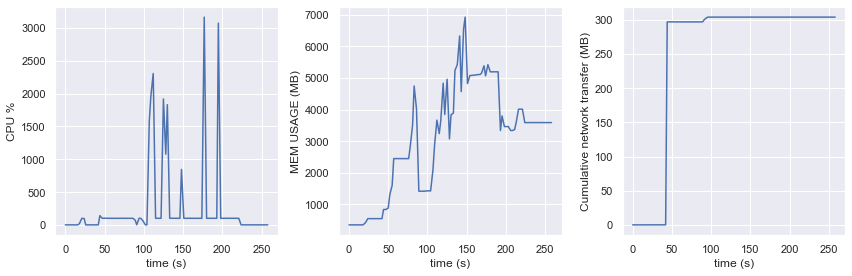

In [4]:
x = meta_df.loc[meta_df['donor']=='H21.33.045']
s = x['size'].values[0]
cells = x['cells'].values[0]
print(f'Query size: {s:d} MB; n cells: {cells:d}')
summary("./docker_log_01.csv")

Filesize: 573 MB; n cells: 16760


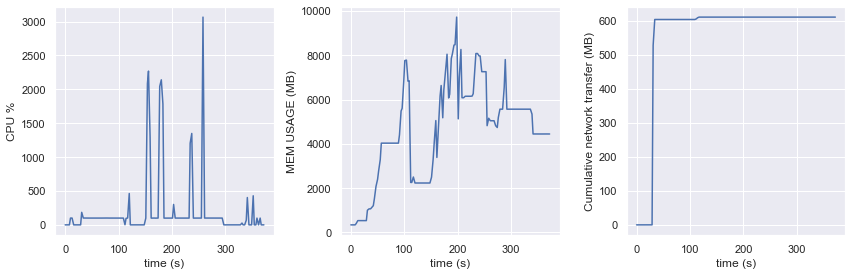

In [5]:
x = meta_df.loc[meta_df['donor']=='H21.33.014']
s = x['size'].values[0]
cells = x['cells'].values[0]
print(f'Query size: {s:d} MB; n cells: {cells:d}')
summary("./docker_log_02.csv")

Filesize: 952 MB; n cells: 30627


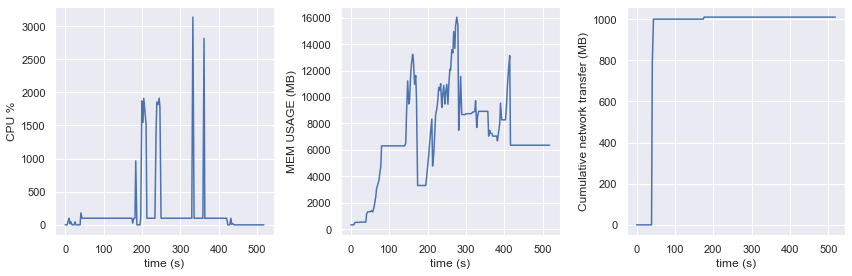

In [6]:
x = meta_df.loc[meta_df['donor']=='H20.33.030']
s = x['size'].values[0]
cells = x['cells'].values[0]
print(f'Query size: {s:d} MB; n cells: {cells:d}')
summary("./docker_log_03.csv")